In [3]:
import os
import pandas as pd
import numpy as np
from scipy import stats

/Users/khandekara2/anaconda3/lib/python3.6/site-packages/numexpr/cpuinfo.py:76: UserWarning: [Errno 2] No such file or directory: 'sysctl': 'sysctl'
  stacklevel=stacklevel + 1):


In [2]:

# pbca_dict = {} #key is sample, value is dictionary(location: methylation ratio)
# maly_dict = {} #key is sample, value is dictionary(location: methylation ratio)

# df = pd.read_csv('/Users/khandekara2/Documents/methylationProject/01_data/PBCA_cds_expanded.tsv', sep='\t')
# for sample in df['id'].unique():
#     pbca_dict[sample] = {}
#     df1 = df[df['id'] == sample]
#     for chrom, start, stop, ratio in zip(df1['chromosome'], df1['start'], df1['stop'], df1['methylation_ratio']):
#         pbca_dict[sample][(str(chrom), int(start), int(stop))] = ratio

# df = pd.read_csv('/Users/khandekara2/Documents/methylationProject/01_data/MALY_cds_expanded.tsv', sep='\t')
# for sample in df['id'].unique():
#     maly_dict[sample] = {}
#     df1 = df[df['id'] == sample]
#     for chrom, start, stop, ratio in zip(df1['chromosome'], df1['start'], df1['stop'], df1['methylation_ratio']):
#         maly_dict[sample][(str(chrom), int(start), int(stop))] = ratio


In [4]:
df = pd.read_csv('/Users/khandekara2/Documents/methylationProject/01_data/all_overlaps_2.bed', sep='\t')

In [5]:
# df['methylation_ratio'] = df['methylation_ratio'].map(lambda x: x/2) apply correction to get rid of signal from other cytosine in dyad?
df

,chromosome,start,stop,id,mutated_from,mutated_to,total_reads,variant_reads,annotation,gene_id,methylation_ratio
0,chr2,28627103,28627104,ICGC_MB1,G,A,14.0,7.0,missense_variant,ENSG00000075426,0.15
1,chr19,51628588,51628589,ICGC_MB107,C,T,44.0,27.0,upstream_gene_variant,ENSG00000129450,0.49
2,chr8,54882959,54882960,ICGC_MB107,G,A,41.0,15.0,exon_variant,ENSG00000187735,0.61
3,chr19,58439284,58439285,ICGC_MB107,G,A,36.0,15.0,synonymous_variant,ENSG00000196724,0.59
4,chr17,40460196,40460197,ICGC_MB107,G,A,42.0,5.0,downstream_gene_variant,ENSG00000126561,0.92
5,chr19,11141425,11141426,ICGC_MB112,C,T,35.0,6.0,missense_variant,ENSG00000127616,0.50
6,chr12,2694652,2694653,ICGC_MB112,C,T,35.0,5.0,synonymous_variant,ENSG00000151067,0.95
7,chr10,103826527,103826528,ICGC_MB112,C,T,59.0,34.0,missense_variant,ENSG00000166189,0.04
8,chr2,75109274,75109275,ICGC_MB112,C,T,38.0,8.0,missense_variant,ENSG00000159399,0.61
9,chr1,3328123,3328124,ICGC_MB112,G,A,31.0,6.0,exon_variant,ENSG00000142611,0.36


In [6]:
#add methylation ratios column by looking up values by sample id
# ratios = []
# for chrom, start, stop, ids in zip( df['chromosome'], df['start'], df['stop'], df['id']):
#     if ids in pbca_dict:
#         ratios.append(pbca_dict[ids][(chrom, start, stop)])
#     elif ids in maly_dict:
#         ratios.append(maly_dict[ids][(chrom, start, stop)])
#     else:
#         print ('Error')

# print (len(ratios))
# df['methylation_ratio'] = ratios

In [7]:
#add cancer type column
cancer_type = []
for ide in df['id']:
    if ide.startswith('ICGC'):
        cancer_type.append('PBCA')
    elif ide.endswith('WGS'):
        cancer_type.append('BOCA')
    else:
        cancer_type.append('MALY')
df['cancer_type'] = cancer_type

In [8]:
#add location column
locations = []
for chrom, start, stop in zip(list(df['chromosome']), list(df['start']), list(df['stop'])):
    locations.append((chrom, start, stop))
df['location'] = locations


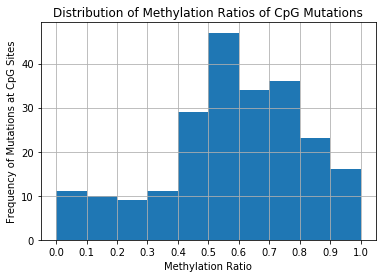

In [9]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
df['methylation_ratio'].hist()
# plt.hist(df['methylation_ratio'])
plt.xticks(np.arange(0, 1.1, 0.1))
plt.title('Distribution of Methylation Ratios of CpG Mutations')
plt.xlabel('Methylation Ratio')
plt.ylabel('Frequency of Mutations at CpG Sites')
plt.savefig('all_overlaps_distribution.png')

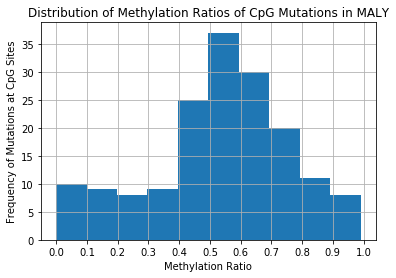

In [10]:
# maly
maly = df[df.cancer_type == 'MALY']
%matplotlib inline
plt.clf()
maly['methylation_ratio'].hist()
plt.xticks(np.arange(0, 1.1, 0.1))
plt.title('Distribution of Methylation Ratios of CpG Mutations in MALY')
plt.xlabel('Methylation Ratio')
plt.ylabel('Frequency of Mutations at CpG Sites')
plt.savefig('maly_overlaps_distribution.png')


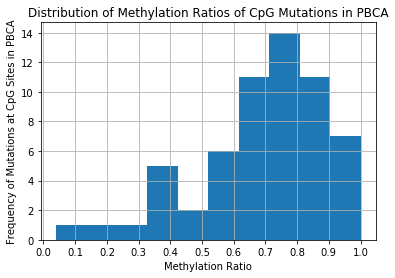

In [11]:
pbca = df[df.cancer_type == 'PBCA']
plt.clf()
pbca['methylation_ratio'].hist()
plt.xticks(np.arange(0, 1.1, 0.1))
plt.title('Distribution of Methylation Ratios of CpG Mutations in PBCA')
plt.xlabel('Methylation Ratio')
plt.ylabel('Frequency of Mutations at CpG Sites in PBCA')
plt.savefig('pbca_overlaps_distribution.png')

In [12]:
#calculate allele frequencies and add vaf column
vaf = []
for v, t in zip(df['variant_reads'], df['total_reads']):
    if v == 'MISSING':
        vaf.append('MISSING')
    else:
        vaf.append(float(v) / float(t))
df['vaf'] = vaf


In [13]:
# df['total_reads'] = pd.to_numeric(df['total_reads'], errors='coerce')
# df['variant_reads'] = pd.to_numeric(df['variant_reads'], errors='coerce')
# df['vaf'] = pd.to_numeric(df['vaf'], errors='coerce')

In [14]:
#get rid of all entries with missing values
not_missing = df[df['variant_reads'] != "MISSING"]


In [15]:
#convert reads columns from objects to floats
not_missing['total_reads'] = pd.to_numeric(not_missing['total_reads'], errors='coerce')
not_missing['variant_reads'] = pd.to_numeric(not_missing['variant_reads'], errors='coerce')
not_missing['vaf'] = pd.to_numeric(not_missing['vaf'], errors='coerce')

/Users/khandekara2/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
/Users/khandekara2/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()
/Users/khandekara2/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value ins

In [16]:
not_missing

,chromosome,start,stop,id,mutated_from,mutated_to,total_reads,variant_reads,annotation,gene_id,methylation_ratio,cancer_type,location,vaf
0,chr2,28627103,28627104,ICGC_MB1,G,A,14.0,7.0,missense_variant,ENSG00000075426,0.15,PBCA,"(chr2, 28627103, 28627104)",0.500000
1,chr19,51628588,51628589,ICGC_MB107,C,T,44.0,27.0,upstream_gene_variant,ENSG00000129450,0.49,PBCA,"(chr19, 51628588, 51628589)",0.613636
2,chr8,54882959,54882960,ICGC_MB107,G,A,41.0,15.0,exon_variant,ENSG00000187735,0.61,PBCA,"(chr8, 54882959, 54882960)",0.365854
3,chr19,58439284,58439285,ICGC_MB107,G,A,36.0,15.0,synonymous_variant,ENSG00000196724,0.59,PBCA,"(chr19, 58439284, 58439285)",0.416667
4,chr17,40460196,40460197,ICGC_MB107,G,A,42.0,5.0,downstream_gene_variant,ENSG00000126561,0.92,PBCA,"(chr17, 40460196, 40460197)",0.119048
5,chr19,11141425,11141426,ICGC_MB112,C,T,35.0,6.0,missense_variant,ENSG00000127616,0.50,PBCA,"(chr19, 11141425, 11141426)",0.171429
6,chr12,2694652,2694653,ICGC_MB112,C,T,35.0,5.0,synonymous_variant,ENSG00000151067,0.95,PBCA,"(chr12, 2694652, 2694653)",0.142857
7,chr10,103826527,103826528,ICGC_MB112,C,T,59.0,34.0,missense_variant,ENSG00000166189,0.04,PBCA,"(chr10, 103826527, 103826528)",0.576271
8,chr2,75109274,75109275,ICGC_MB112,C,T,38.0,8.0,missense_variant,ENSG00000159399,0.61,PBCA,"(chr2, 75109274, 75109275)",0.210526
9,chr1,3328123,3328124,ICGC_MB112,G,A,31.0,6.0,exon_variant,ENSG00000142611,0.36,PBCA,"(chr1, 3328123, 3328124)",0.193548


In [17]:
not_missing.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 207 entries, 0 to 225
Data columns (total 14 columns):
chromosome           207 non-null object
start                207 non-null int64
stop                 207 non-null int64
id                   207 non-null object
mutated_from         207 non-null object
mutated_to           207 non-null object
total_reads          207 non-null float64
variant_reads        207 non-null float64
annotation           207 non-null object
gene_id              207 non-null object
methylation_ratio    207 non-null float64
cancer_type          207 non-null object
location             207 non-null object
vaf                  207 non-null float64
dtypes: float64(4), int64(2), object(8)
memory usage: 24.3+ KB


In [18]:
xs = np.array(list(not_missing['vaf']))
ys = np.array(list(not_missing['methylation_ratio']))
ids = list(not_missing['id'])

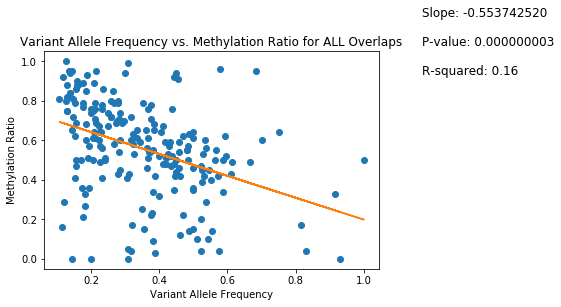

In [19]:
slope, intercept, r_value, p_value, std_err = stats.linregress(xs, ys)
line = slope * xs + intercept
plt.figure()
plt.plot(xs, ys, 'o', xs, line, '-')
plt.xlabel('Variant Allele Frequency')
plt.ylabel('Methylation Ratio')
plt.title('Variant Allele Frequency vs. Methylation Ratio for ALL Overlaps')
plt.gcf().text(1.0, 1.0, "Slope: %.9f" % slope, fontsize=12)
plt.gcf().text(1.0, 0.9, "P-value: %.9f" % p_value, fontsize=12)
plt.gcf().text(1.0, 0.8, "R-squared: %.2f" % r_value ** 2, fontsize=12)

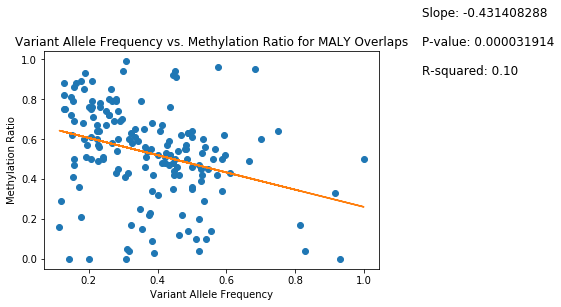

In [20]:
maly_not_missing = not_missing[not_missing['cancer_type'] == 'MALY']
xs = np.array(list(maly_not_missing['vaf']))
ys = np.array(list(maly_not_missing['methylation_ratio']))
slope, intercept, r_value, p_value, std_err = stats.linregress(xs, ys)
line = slope * xs + intercept
plt.figure()
plt.plot(xs, ys, 'o', xs, line, '-')
plt.xlabel('Variant Allele Frequency')
plt.ylabel('Methylation Ratio')
plt.title('Variant Allele Frequency vs. Methylation Ratio for MALY Overlaps')
plt.gcf().text(1.0, 1.0, "Slope: %.9f" % slope, fontsize=12)
plt.gcf().text(1.0, 0.9, "P-value: %.9f" % p_value, fontsize=12)
plt.gcf().text(1.0, 0.8, "R-squared: %.2f" % r_value ** 2, fontsize=12)

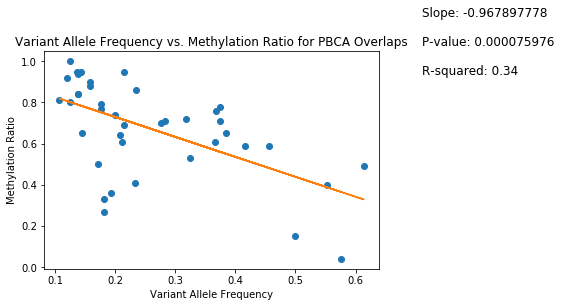

In [21]:
pbca_not_missing = not_missing[not_missing['cancer_type'] == 'PBCA']
xs = np.array(list(pbca_not_missing['vaf']))
ys = np.array(list(pbca_not_missing['methylation_ratio']))
slope, intercept, r_value, p_value, std_err = stats.linregress(xs, ys)
line = slope * xs + intercept
plt.figure()
plt.plot(xs, ys, 'o', xs, line, '-')
plt.xlabel('Variant Allele Frequency')
plt.ylabel('Methylation Ratio')
plt.title('Variant Allele Frequency vs. Methylation Ratio for PBCA Overlaps')
plt.gcf().text(1.0, 1.0, "Slope: %.9f" % slope, fontsize=12)
plt.gcf().text(1.0, 0.9, "P-value: %.9f" % p_value, fontsize=12)
plt.gcf().text(1.0, 0.8, "R-squared: %.2f" % r_value ** 2, fontsize=12)

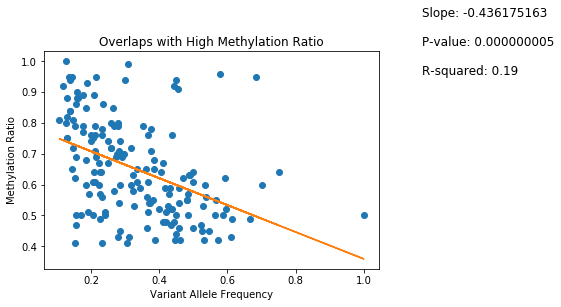

In [22]:
# plot only the high methylation ratios
mid_high_ratio = not_missing[not_missing['methylation_ratio'] > 0.4]
x = np.array(list(mid_high_ratio['vaf']))
y = np.array(list(mid_high_ratio['methylation_ratio']))
slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)
line = slope * x + intercept
plt.figure()
plt.plot(x, y, 'o', x, line, '-')
plt.xlabel('Variant Allele Frequency')
plt.ylabel('Methylation Ratio')
plt.title('Overlaps with High Methylation Ratio')
plt.gcf().text(1.0, 1.0, "Slope: %.9f" % slope, fontsize=12)
plt.gcf().text(1.0, 0.9, "P-value: %.9f" % p_value, fontsize=12)
plt.gcf().text(1.0, 0.8, "R-squared: %.2f" % r_value ** 2, fontsize=12)
# print (len(x))
# print (len(y))

In [23]:
df['vaf'] = vaf


In [24]:
no_boca

NameError: name 'no_boca' is not defined

In [ ]:
medium_ratio


In [ ]:
medium_ratio = not_missing[(not_missing['methylation_ratio'] > 0.4) & (not_missing['methylation_ratio'] < 0.7)]
x1 = medium_ratio['vaf']
y1 = medium_ratio['methylation_ratio']
plt.figure()
plt.scatter(x1, y1)
plt.xlabel('Variant Allele Frequency')
plt.ylabel('Methylation Ratio')
plt.title('Overlaps with Intermediate Methylation Ratio')

In [ ]:
low_ratio = not_missing[(not_missing['methylation_ratio'] >= 0) & (not_missing['methylation_ratio'] <= 0.4 )]
x2 = low_ratio['vaf']
y2 = low_ratio['methylation_ratio']
plt.figure()
plt.scatter(x2, y2)
plt.xlabel('Variant Allele Frequency')
plt.ylabel('Methylation Ratio')
plt.title('Overlaps with Low Methylation Ratio')

In [ ]:
not_missing

In [ ]:
#import seaborn as sns
# sns.distplot(not_missing.vaf.dropna(), kde=False)
# sns.plt.show()
plt.figure()
plt.hist(not_missing.vaf, bins=range(0, 1.1, 1))
plt.xticks()

In [ ]:
df.info()

In [ ]:
# create boxplots
import seaborn as sns
ax = sns.boxplot(x="cancer_type", y="vaf", data=not_missing)
ax = sns.swarmplot(x="cancer_type", y="vaf", data=not_missing, color=".25")
ax.figure.savefig('overlap_vafs_distribution.png')

In [ ]:
ax2 = sns.boxplot(x="cancer_type", y="methylation_ratio", data=not_missing)
ax2 = sns.swarmplot(x="cancer_type", y="methylation_ratio", data=not_missing, color=".25")

In [ ]:
#split methylation ratios into groups(low, medium, high) based on thresholds
methylation_level = []
for ratio in not_missing['methylation_ratio']:
    if ratio >= 0.8:
        methylation_level.append('high')
    elif ratio < 0.8 and ratio > 0.2:
        methylation_level.append('medium')
    else: #ratio < 0.2
        methylation_level.append('low')

not_missing['methylation_level'] = methylation_level

In [ ]:
ax = sns.boxplot(x="methylation_level", y="vaf", data=not_missing)
ax = sns.swarmplot(x="methylation_level", y="vaf", data=not_missing, color=".25")

In [ ]:
#plot distribution of methylation ratios vs. vaf BOCA
boca = not_missing[not_missing['cancer_type'] == 'BOCA']
x3 = list(boca['vaf'])
y3 = list(boca['methylation_ratio'])
plt.figure()
plt.scatter(x3, y3)
plt.xlabel('Variant Allele Frequency')
plt.ylabel('Methylation Ratio')
plt.title('Variant Allele Frequency vs. Methylation Ratio for BOCA only')

In [25]:
maly = df[df['cancer_type'] == 'MALY']
pbca = df[df['cancer_type'] == 'PBCA']

In [26]:
#helper function that takes in a dataframe and returns a dictionary that maps location to methylation ratio
def locationToRatio(dataframe):
    locations = []
    for chrom, start, stop in zip(list(dataframe['chromosome']), list(dataframe['start']), list(dataframe['stop'])):
        locations.append((chrom, start, stop))
    dataframe['location'] = locations
    locationToRatio_dict = dict(zip(dataframe['location'], dataframe['methylation_ratio']))
    return locationToRatio_dict

In [27]:
#obtain normal methylation ratios from thymus for MALY
thymus = pd.read_csv('/Users/khandekara2/Documents/methylationProject/01_data/thymus_cds_cpgs.bed', sep='\t')
thymus_dict = locationToRatio(thymus)

In [ ]:
maly

In [29]:
normal_ratio = []
count = 0
for location in maly['location']:    
#     print (type(location[0]))
#     print (type(location[1]))
#     print (type(location[2]))
#     print (type(location))
#     break 
    if location in thymus_dict.keys():
        normal_ratio.append(thymus_dict[location])
    else:
        normal_ratio.append(None)
        count += 1
print (count)
# print (len(normal_ratio))
# for key, value in thymus_dict.items():
#     print (type(key[0]))
#     print (type(key[1]))
#     print (type(key[2]))
#     print (type(key))
#     break
    

0


In [30]:
maly['normal_ratio'] = normal_ratio

/Users/khandekara2/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [ ]:
 
maly = maly.dropna()

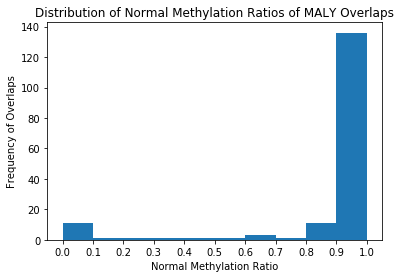

In [31]:
plt.hist(maly['normal_ratio'])
plt.xticks(np.arange(0, 1.1, 0.1))
plt.title('Distribution of Normal Methylation Ratios of MALY Overlaps')
plt.xlabel('Normal Methylation Ratio')
plt.ylabel('Frequency of Overlaps')
plt.savefig('MALY_normal_overlaps_distribution.png')

In [ ]:
#obtain normal methylation ratios from neural progenitor cell for PBCA
# neural = pd.read_csv('/Users/khandekara2/Documents/methylationProject/01_data/neural_stem_progenitor_cds.tsv', sep='\t')
# neural_dict = locationToRatio(neural)

In [36]:
um = maly[maly['normal_ratio'] <= 0.2]
um

,chromosome,start,stop,id,mutated_from,mutated_to,total_reads,variant_reads,annotation,gene_id,methylation_ratio,cancer_type,location,vaf,normal_ratio,cancer_ratio
76,chr13,41240288,41240289,tumor_4119027,G,A,18,7,missense_variant,ENSG00000150907,0.03,MALY,"(chr13, 41240288, 41240289)",0.388889,0.000000,0.868077
78,chr17,74733233,74733234,tumor_4119027,G,A,23,12,upstream_gene_variant,ENSG00000092931,0.04,MALY,"(chr17, 74733233, 74733234)",0.521739,0.000000,0.947308
82,chr13,34392357,34392358,tumor_4121361,C,T,35,5,missense_variant,ENSG00000133119,0.00,MALY,"(chr13, 34392357, 34392358)",0.142857,0.000000,0.930385
89,chr12,75601468,75601469,tumor_4121361,C,T,32,5,missense_variant,ENSG00000166006,0.50,MALY,"(chr12, 75601468, 75601469)",0.15625,0.000000,0.610000
100,chr20,37356529,37356530,tumor_4121361,G,A,50,6,missense_variant,ENSG00000101438,0.29,MALY,"(chr20, 37356529, 37356530)",0.12,0.000000,0.949231
116,chr1,99730141,99730142,tumor_4134005,C,T,32,12,missense_variant,ENSG00000117600,0.22,MALY,"(chr1, 99730141, 99730142)",0.375,0.000000,0.560000
122,chr8,1949757,1949758,tumor_4134005,G,A,8,4,missense_variant,ENSG00000176595,0.36,MALY,"(chr8, 1949757, 1949758)",0.5,0.000000,0.671154
128,chr22,23524068,23524069,tumor_4158726,C,T,25,6,intron_variant,ENSG00000186716,0.51,MALY,"(chr22, 23524068, 23524069)",0.24,0.000000,0.787692
136,chr19,47951333,47951334,tumor_4159170,C,T,16,5,intron_variant,ENSG00000118160,0.43,MALY,"(chr19, 47951333, 47951334)",0.3125,0.062500,0.814231
138,chr15,63335102,63335103,tumor_4159170,G,A,13,4,downstream_gene_variant,ENSG00000259498,0.00,MALY,"(chr15, 63335102, 63335103)",0.307692,0.050000,0.958846


In [ ]:
normal_ratio = np.array(list(maly['normal_ratio']))
cancer_ratio = np.array(list(maly['methylation_ratio']))# / (1.00 - vafs)
#cancer_ratio[cancer_ratio > 2] = 2
#cancer_ratio[np.isinf(cancer_ratio)] = 1
print(np.mean(cancer_ratio))
colors = {'ACG':'red', 'TCG':'blue', 'CCG':'green', 'GCG':'black'}
plt.figure()
plt.scatter(1-vafs, cancer_ratio, c=maly['context'].apply(lambda x: colors[x]))
plt.xlabel('Normal Ratio')
plt.ylabel('Tumor Ratio')

plt.title('Normal Ratio vs Tumor Ratio of Overlaps in MALY')

In [35]:
#get average tumor methylation ratios (averaged over 26 samples) of overlaps
df = pd.read_csv('/Users/khandekara2/Documents/methylationProject/01_data/MALY_overlap_ratios.bed', sep='\t')
locations = []
for chrom, start, stop in zip(list(df['chromosome']), list(df['start']), list(df['stop'])):
    locations.append((chrom, start, stop))
df['location'] = locations
grouped = df['methylation_ratio'].groupby(df['location'])
groupby = grouped.agg([np.mean, np.std])
groupby.reset_index(inplace=True)
cancer_ratio = groupby['mean']
maly['cancer_ratio'] = cancer_ratio

/Users/khandekara2/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [ ]:
normal_ratio = np.array(list(maly['normal_ratio'])) #from thymus
vafs = np.array(list(maly['vaf']))
cancer_ratio = groupby['mean'] # / (1 - vafs + 0.3) #average from 26 MALY samples
colors = {'ACG':'red', 'TCG':'blue', 'CCG':'green', 'GCG':'black'}
plt.figure()
plt.scatter(normal_ratio, cancer_ratio, c=maly['context'].apply(lambda x: colors[x]))
plt.xlabel('Normal Ratio')
plt.ylabel('Tumor Ratio')
plt.title('Normal Ratio vs Tumor Ratio of Overlaps in MALY')


In [ ]:
#now we plot a 3D scatterplot, incorporating VAF into the analysis
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
normal_ratio = np.array(list(maly['normal_ratio']))
cancer_ratio = np.array(list(maly['methylation_ratio']))
vafs = np.array(list(maly['vaf']))
ax.scatter(normal_ratio, vafs, cancer_ratio, c=maly['context'].apply(lambda x: colors[x]), marker='o')
ax.set_xlabel('Normal Ratio')
ax.set_ylabel('Tumor Ratio')
ax.set_zlabel('Variant Allele Frequency')

In [ ]:
maly

In [ ]:
#add a strand column and a sequence context column
strand = []
for base in maly['mutated_from']:
    if base == 'C':
        strand.append('+')
    elif base == 'G':
        strand.append('-')
    else:
        break
print (len(strand))
maly['strand'] = strand


In [ ]:
maly_temp = maly[['chromosome', 'start', 'stop', 'id', 'methylation_ratio', 'strand']]
maly_temp.to_csv('MALY_temp.bed', sep='\t', index=False, header=False)

In [ ]:
#now we compare non-overlaps, those CpG sites which did NOT have a mutation 

In [ ]:
contexts = pd.read_csv('/Users/khandekara2/Documents/methylationProject/01_data/MALY_temp.bed', sep='\t', header=None)
seq = list(contexts.iloc[:, 6])
maly['context'] = seq

In [ ]:
#add sequence context column after bedtools getfasta step
maly['context'] = maly['context'].apply(lambda x: x.upper())

In [ ]:
temp = maly[(maly['normal_ratio'] > 0.8) & (maly['methylation_ratio'] < 0.1)]

In [ ]:
pbca.to_csv('PBCA_overlaps.tsv', sep='\t', index=False)
maly.to_csv('MALY_overlaps.bed', sep='\t', index=False)
df.to_csv('all_overlaps.tsv', sep='\t', index=False)